Mayo 2021
# Algoritmo Ford - Fulkerson: Flujo Máximo

## 1. Algoritmo Ford - Fulkerson

### Flujo máximo

Los problemas de flujo máximo implican encontrar un flujo factible a través de una red con una sola fuente y un solo sumidero que sea máximo.

Veamos la siguiente gráfica:

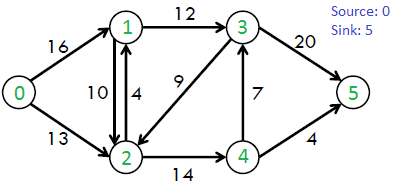

In [2]:
from IPython.display import Image
Image(filename='img/ford_fulkerson1.png')

Cada arco está etiquetado por una capacidad la cual representa el flujo máximo que puede pasar del nodo $i$ al nodo $j$. El objetivo es encontrar la capacidad máxima de flujo que pasa del nodo origen (fuente) al nodo destino (sumidero). El flujo máximo en esta red es 23.


A continuación se muestran diferentes enfoques para resolver este problema de flujo máximo:

**1. Aproximación del Algoritmo Naive Greedy (puede que no produzca un resultado óptimo o correcto)**

Esta aproximación del problema del flujo máximo comienza con el flujo total cero y produce flujos con un valor cada vez mayor. La forma natural de pasar de uno a otro es enviar más flujo en algún camino de $s$ a $t$

Cómo funciona el enfoque Greedy para encontrar el flujo máximo:


        E número de arista
        f(e) flujo que se encuentra en la arista e.
        C(e) capacidad de la arista e.


                1) Inicializa : max_flow = 0  
                f(e) = 0 para cada arista e en E.
            
                2) Encontrar un camino de s a t (mientras exista).   
                   a) El camino existe si f(e) < C(e) para cada arista e en el camino. 
                   b) Si no se encuentra un camino, return max_flow.
                   c) Else encontrar el valor mínimo para la ruta P
        
      // Nuestro flujo está limitado por el flujo que queda
    
      (i) flow = min(C(e)- f(e)) Para el camino P.
             max_flow += flow
      (ii) Para cada arista e del camino, incrementar el flujo
             f(e) += flow

                3) Return max_flow 


Nótese que la búsqueda de ruta solo necesita determinar si hay una ruta $s-t$ en el subgrafo de los bordes $e$ con $f(e) <C(e)$ por lo que no es costoso computacionalmente.

Veamos elsiguiente ejemplo:

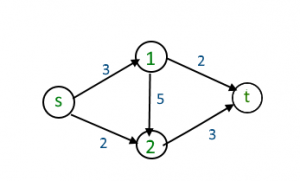

In [7]:
Image(filename='img/ford_fulkerson2.png')

Existe un camino de s a t $s \rightarrow 1  \rightarrow 2  \rightarrow t$ con un flujo máximo de 3 unidades (la ruta se muestra en color azul)

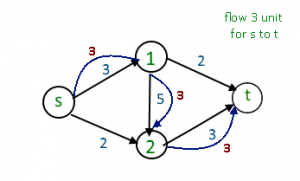

In [11]:
Image(filename='img/ford_fulkerson4.png')

La capacidad restante está representada por los números de color verde.

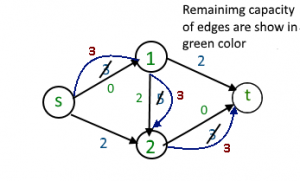

In [12]:
Image(filename='img/ford_fulkerson5.png')

Para el gráfico anterior notamos que no existe un camino de $s \rightarrow t$, por lo que el flujo máximo es de 3 unidades. Pero el flujo máximo que sale del nodo origen es de 5 unidades, así como el flujo máximo que llega al nodo destino.

Para superar este problema utilizamos el gráfico residual.

**2. Gráfico residual** 

La idea es extender el algoritmo mencionado anteriormente al permitir operaciones de "deshacer". Por ejemplo, desde el punto donde este algoritmo se atasca en la imagen de arriba, nos gustaría enrutar dos unidades más de flujo a lo largo del borde $(s, 2)$, luego hacia atrás a lo largo del borde $(1, 2)$, deshaciendo 2 de las 3 unidades enrutamos la iteración anterior, y finalmente a lo largo del borde $(1, t)$


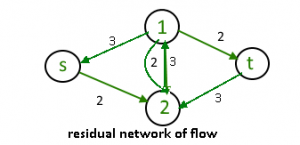

In [14]:
Image(filename='img/ford_fulkerson7.png')

Consideremos: 
* Arco inverso: $f (e)$
* Arco: $C (e) - f (e)$

Necesitamos una forma de especificar formalmente las operaciones de "deshacer" permitidas. Esto motiva la siguiente definición simple pero importante, de una red residual:

Dado un grafo $G$ y un flujo $f$ en él, formamos una nueva red de flujo $G_f$ que tiene el mismo conjunto de vértices de $G$ y por cada arco de $G$ se crean dos nuevos arcos.

Por ejemplo, el arco $e = (1,2 )$ de $G$ lleva el flujo $f (e)$ y tiene capacidad $C (e)$ (para la imagen de arriba) genera un arco  de $G_f$ con capacidad $C (e) -f (e)$ (la capacidad restante) y un arco inverso $(2,1)$ de $G_f$ con capacidad $f (e)$ (la cantidad de flujo previamente encaminado que se puede deshacer). Ahora se tiene un camino de $s$ a $t$ con capacidad $f (e) <C (e)$ para todos los arcos.




La idea de utilizar gráficos residuales para flujo máximo se utiliza en el algoritmo de Ford-Fulkerson.


### Algoritmo Ford-Fulkerson

El algoritmo de Ford-Fulkerson propone buscar caminos en los que se pueda aumentar el flujo, hasta que se alcance el flujo máximo. Su nombre viene dado por sus creadores, *L. R. Ford, Jr*. y *D. R. Fulkerson*

Sea $G(V,E)$ un grafo, con $V$ vértices, $E$ aristas y donde por cada arista $(u,v)$, tenemos una capacidad $c(u,v)$ y un flujo $f(u,v)$. Se busca maximizar el valor del flujo desde una fuente $s$ hasta un sumidero $t$.

El método inicia con $f(u,v)=0$ para toda $(u,v) \in V)$. En cada iteración, se incrementa el flujo en $G$ mediante el resultado de una búsqueda de un camino de aumento en una red.

El flujo a aumentar se debe considerar legal, es decir:

   **El flujo de para toda arista $(u,v)$ no debe ser mayor que la capacidad de dicha arista. El flujo que sale de la fuente $s$ debe ser igual al que llega al sumidero $t$.**

Nota: En una red con fuente $s$ y sumidero $t$ único el valor máximo que puede tomar un flujo variable es igual a la capacidad mínima que puede tomar un corte.

**Red residual**

Como se mencionó anteriormente, definimos una red residual $G_f(V,E)$ como la red donde la capacidad de cada una de las aristas se define como $c_f(u,v)= c(u,v) - f(u,v)$ , donde $c(u,v)$ es la capacidad de la arista y el flujo $f(u,v)$ es el flujo de la arista $(u,v)$ en el camino de aumento seleccionado.

Intuitivamente, dado el grafo $G$ y un camino de aumento $c_F$, la red residual $G_f$ consiste en el grafo que representa el como cambia la capacidad de cada una de las aristas con respecto al flujo del camino de aumento $c_F$ en el grafo $G$.

**Caminos de aumento**

Un camino de aumento es un camino dirigido de la fuente $s$ al sumidero $t$ en $G_f$, donde la capacidad del camino de aumento es el mínimo de las capacidades de sus aristas.

**Complejidad**

Al agregar un camino de aumento al flujo ya establecido en el gráfico, se alcanzará el flujo máximo cuando no se puedan encontrar más caminos de aumento de flujo en el gráfico. Sin embargo, no hay certeza de que esta situación se llegue alguna vez, por lo que lo mejor que se puede garantizar es que la respuesta será correcta si el algoritmo termina. En el caso de que el algoritmo se ejecute indefinidamente, es posible que el flujo ni siquiera converja hacia el flujo máximo. Sin embargo, esta situación solo ocurre con valores de flujo irracionales. 

Cuando las capacidades son números enteros, el tiempo de ejecución de Ford-Fulkerson está limitado por $O(E_f)$, donde $E$ es el número de aristas en el gráfico y $f$ es el flujo máximo en el gráfico. Esto se debe a que cada ruta de aumento se puede encontrar en el tiempo $O(E)$ y aumenta el flujo en una cantidad entera de al menos $1$, con el límite superior $f$.

**Pseudocódigo**

      Ford-Fulkerson(G,s,t) {
      Gf = Crear_grafo_residual(G);
      for (cada arista (u,v) de E) {
          f[u,v]= 0;
      }
      while (exista un camino p desde s a t en la red residual Gf) {
          cf(p) = min{cf(u,v): (u,v) está sobre p};
          for (cada arista (u,v) en p) {
              f[u,v]= f[u,v] + cf(p);
              f[v,u]= f[v,u] - cf(p);
          }
          Actualizar_grafo_residual(Gf);
      }

    }


### Aplicaciones en la vida real

**Eliminación de béisbol**

En el problema de la eliminación del béisbol, hay $n$ equipos compitiendo en una liga. En una etapa específica de la temporada de la liga, $w_ii$ es el número de victorias y $ri$ es el número de juegos que quedan por jugar para el equipo $i$ y $r_{ij}$ es el número de juegos que quedan contra el equipo $j$.

Un equipo es eliminado si no tiene la oportunidad de terminar la temporada en primer lugar. La tarea del problema de eliminación del béisbol es determinar qué equipos son eliminados en cada punto durante la temporada. [Schwartz, B. L](https://ui.adsabs.harvard.edu/abs/1966SIAMR...8..302S/abstract) propuso un método que reduce este problema a como un problema de flujo máximo en una red. 

En este método se crea una red para determinar si se elimina el equipo $k$.

Sea $G = (V, E)$ una red con $s$ y $t \in V$ la fuente y el sumidero respectivamente. Uno agrega un nodo de juego $(i, j)$ con $i <j$ al conunto de vértices y conecta cada uno de ellos desde $s$ por un borde con capacidad $r_{ij}$, que representa el número de jugadas entre estos dos equipos. También agregamos un nodo de equipo para cada equipo y conectamos cada nodo de juego $(i, j)$ con dos nodos de equipo $i$ y $j$ para asegurarnos de que uno de ellos gane. No es necesario restringir el valor de flujo en estos bordes. 
Finalmente, los arcos se hacen desde el nodo del equipo $i$ al nodo sumidero $t$ y la capacidad de $w_k + r_k – w_i $ se establece para evitar que el equipo $i$ gane más de $w_k + r_k$.
Sea $S$ el conjunto de todos los equipos que participan en la liga y sea 
$r (S - {k}) = \sum_{i, j \in {S - {k}}, i <j}r_{ij}$ . En este método se afirma que el equipo $k$ no se elimina si y solo si existe un flujo de tamaño $r (S - {k})$ en la red $G$. En el artículo mencionado se demuestra que este valor de flujo es el valor de flujo máximo de $s$ a $t$.




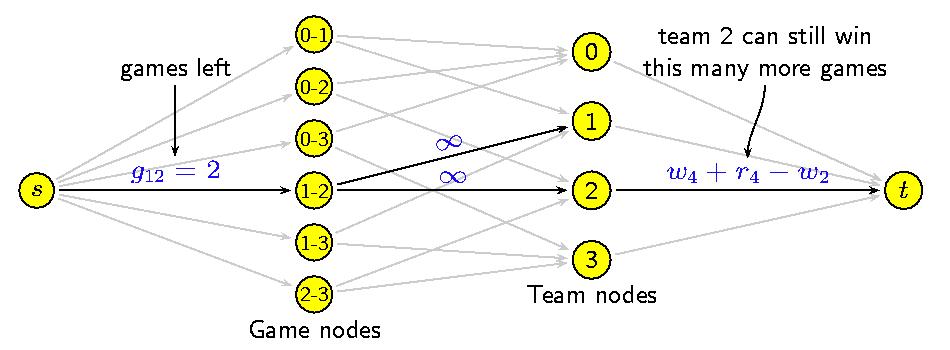

In [3]:
Image(filename='img/ford_fulkerson9.png')

**Planificación de aerolíneas**

En la industria de las aerolíneas, un problema importante es la programación de las tripulaciones de vuelo. El problema de la programación de la aerolínea puede considerarse como una aplicación del flujo de red máximo extendido. La entrada de este problema es un conjunto de vuelos F que contiene la información sobre dónde y cuándo sale y llega cada vuelo. En una versión de la programación de las aerolíneas, el objetivo es producir un programa factible con un máximo de $k$ tripulaciones.

Para resolver este problema, se utiliza una variación del problema de circulación llamado circulación limitada, que es la generalización de los problemas de flujo de la red, con la restricción adicional de un límite inferior en los flujos de borde.

Sea $G = (V, E)$ una red con $s, t \in V$ como los nodos fuente y sumidero. Para la fuente y el destino de cada vuelo $i$, se agregan dos nodos a $V$, el nodo $s_i$ como la fuente y el nodo $d_i$ como el nodo de destino del vuelo $i$. También se agregan los siguientes arcos a $E$:

1. Un arco con capacidad 0 cuya capacidad máxima es $1$ entre $s$ y cada $s_i$. 
2. Un arco con capacidad 0 cuya capacidad máxima es $1$ para cada $d_i$ y $t$. 
3. Un arco con capacidad 1 cuya capacidad máxima es $1$ entre cada par de $s_i$ y $d_i$. 
4. Un arco con capacidad $[0,1]$ entre cada $d_i$ y $s_j$, si la fuente $s_j$ es accesible con una cantidad de tiempo y costo razonables desde el destino del vuelo $i$.
5. Un arco con capacidad $[0, \infty]$ entre $s$ y $t$. 


En el método mencionado, se prueba que encontrar un valor de flujo de $k$ en $G$ entre $s$ y $t$ es igual a encontrar un flujo factible para el conjunto de vuelos $F$ con un máximo de $k$ tripulaciones. 

Otra versión de la programación de las aerolíneas es encontrar las tripulaciones mínimas necesarias para realizar todos los vuelos. Para encontrar una respuesta a este problema, se crea un gráfico bipartito $G'= (A \cup B, E)$ donde cada vuelo tiene una copia en el conjunto $A$ y en el conjunto $B$. Si el mismo avión puede realizar el vuelo $j$ después del vuelo $i$, $i \in A$ está conectado a $j \in B$. Una coincidencia en $G'$ induce un horario para $F$ y, obviamente, la máxima coincidencia bipartita en este gráfico produce un horario de línea aérea con un número mínimo de tripulaciones. La coincidencia bipartita de cardinalidad máxima es una aplicación del problema de flujo máximo. 



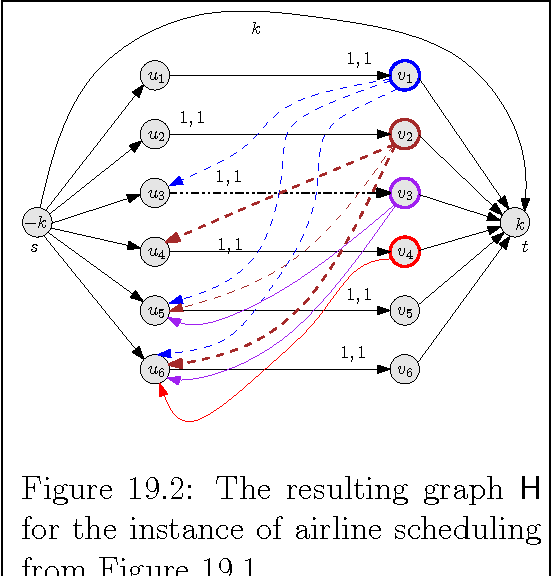

In [4]:
Image(filename='img/ford_fulkerson10.png')

**Problema de circulación-demanda**

Hay algunas fábricas que producen bienes y algunos pueblos donde los bienes deben entregarse. Están conectados por una red de carreteras y cada carretera tiene una capacidad c para el máximo de mercancías que pueden fluir a través de ella. El problema es encontrar si existe una circulación que satisfaga la demanda. Este problema puede transformarse en un problema de flujo máximo si se agregan los siguintes puntos:

1. Agregar un nodo de origen $s$ y arcos desde él a cada nodo de fábrica $f_i$ con capacidad $p_i$ donde $p_i$ es la tasa de producción de $f_i$ de fábrica.

2. Agregar un nodo sumidero $t$ y arcos de todas las aldeas $v_i$ a $t$ con capacidad $d_i$ donde $d_i$ es la tasa de demanda de la aldea $v_i$. 

Sea $G = (V, E)$ esta nueva red. Existe una circulación que satisface la demanda si y solo si:

$$\text{Flujo Máximo} = \sum_{i \in V} d_i$$

Si existe una ciculacion, la solución de flujo máximo daría la respuesta sobre la cantidad de mercancías que deben enviarse por una carretera en particular para satisfacer las demandas.

El problema se puede ampliar agregando un límite inferior al flujo en algunos bordes.



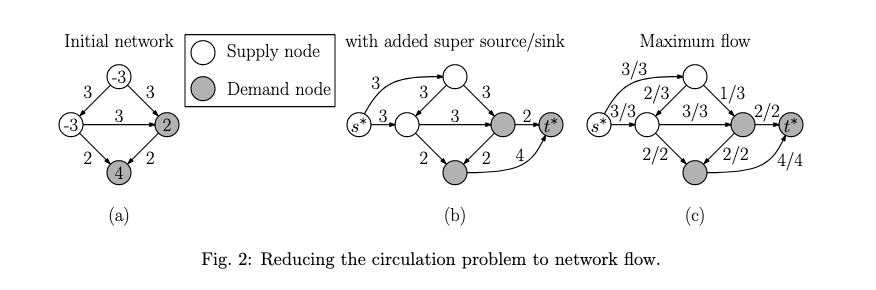

In [7]:
Image(filename='img/ford_fulkerson11.png')

**Segmentación de imágenes**

[Kleinberg y Tardos](https://www.pearson.com/us/higher-education/program/Kleinberg-Algorithm-Design/PGM319216.html)
presentan un algoritmo para encontrar el fondo y el primer plano en una imagen. Más precisamente, el algoritmo toma un mapa de bits como entrada modelada de la siguiente manera: $a_i \geq 0$ es la probabilidad de que el píxel $i$ pertenezca al primer plano, $b_i \geq 0$ en la probabilidad de que el píxel $i$ pertenezca al fondo y $p_{ij}$ es la penalización si los píxeles adyacentes $i$ y $j$ se colocan uno en primer plano y el otro en el fondo. El objetivo es encontrar una partición $(A, B)$ del conjunto de píxeles que maximice la siguiente cantidad:

$$q(A,B) = \sum_{i \in A} a_i + \sum_{i \in B} b_i  - \sum_{i, j \text{ adyacentes}} p_{ij},$$

De hecho, para los píxeles en $A$ (considerados como el primer plano), ganamos $a_i$; para todos los píxeles en $B$ (considerados como el fondo), ganamos $b_i$. En el borde, entre dos píxeles adyacentes $i$ y $j$, perdemos $p_{ij}$. Equivale a minimizar la cantidad

$$q'(A,B) = \sum_{i \in A} a_i + \sum_{i \in B} b_i  + \sum_{i, j \text{ adyacentes}} p_{ij},$$

porque 

$$q(A,B) = \sum_{i \in A} a_i + \sum_{i \in B} b_i - q'(A,B).$$


Ahora construimos la red cuyos nodos son el píxel, más una fuente y un sumidero. Conectamos la fuente al píxel $i$ por un arco de peso $a_i$. Conectamos el píxel $i$ al sumidero por un arco de peso $b_i$. Conectamos el píxel $i$ al píxel $j$ con peso $p_{ij}$. Ahora, queda por calcular un corte mínimo en esa red (o equivalentemente un flujo máximo). 

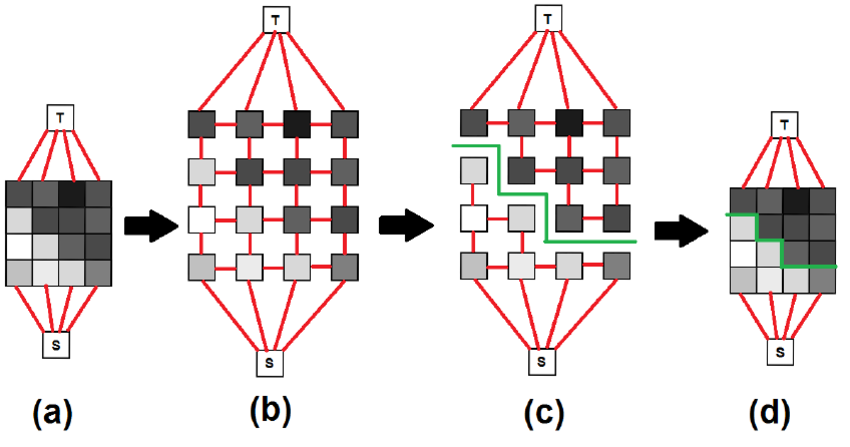

In [8]:
Image(filename='img/ford_fulkerson12.png')

## 2. Desarrollo de ffmaxflow
código original, documentación, (león)

## 3. Reimplementación de ffmaxflow
### 3.1 Robustecimiento
#### 3.1.1 Kubernetes

Kubernetes es una herramienta desarrollada inicialmente por Google que después fue liberada y donada a [Cloud Native Computing Foundation](https://www.cncf.io/) (CNCF) en 2014. Esta heramienta también es abreviada como *kube* o *k8s* y es una plataforma open source que automatiza las operaciones de los contenedores de Linux. Elimina muchos de los procesos manuales involucrados en la implementación y escalabilidad de las aplicaciones en contenedores. Es decir, kubernetes crea clústers que ejecutan contenedores y ayuda a administrar de forma sencilla y eficiente estos clústeres y sus recursos. .Kubernetes es un orquestador de contenedores que nos ayuda a maximizar el potencial de los contenedores.

La principal ventaja de usar Kubernetes es que dispone de una plataforma para programar y ejecutar contenedores en clústeres de máquinas virtuales o físicas. A grandes rasgos, permite implementar una infraestructura basada en contenedores en los entornos de producción, y depender completamente de ella. Como Kubernetes abarca todo lo referido a la automatización de tareas operativas, puede hacer muchas de las cosas que también otras plataformas de aplicaciones o sistemas de gestión le permiten hacer, pero para contenedores.

Es importante mencionar que esta herramienta de orquestación requiere de al menos 3 nodos: un máster y otros dos actuan como repositorios de contenedores. La interacción con Kubernetes se hace únicamente con el master, al cual se le dan las órdenes de despliegue, corrida, etc. de nuestros contenedores.

**Minikube**

Una de las dificultades de utilizar kubernetes es precisamente que al estar pensado para clústeres, necesita de al menos 3 nodos para funcionar. Esto resulta inconveniente para realizar pruebas locales, aquí es donde entra minikube.

Minikube también es una herramienta open source, ésta permite el uso de kubernetes en una sóla computadora local, corre un clúster de un sólo nodo dentro de una máquina virtual dentro de la máquina local. Permitiendo así correr demos o experiementos de operaciones de kubernetes sin necesitar de clústeres reales o la instalación completa de kubernetes.

En otras palabras, minikube toma la kubernetes y lo comprime de manera que quepa en una laptop conservando las mismas ventajas y funcionalidades. Además, es útil para que usuarios nuevos se familiaricen con los conceptos y configuraciones básicos de kube. 

#### 3.1.2 Kubeflow
Kubeflow es un proyecto construído encima de kubernetes compuesto por varias herramientas y *frameworks* para realizar el desarrollo, despliegue y administración de modelos de aprendizaje de máquina de forma sencilla y escalable. El objetivo de kubeflow es servir como un administrador de inicio a fin para insfraestructura de aprendizaje de máquina de manera simple, portable y escalable.

El ciclo de vida de un proyecto de machine learning es muy diverso y consta de varias etapas. Si uno no es cuidadoso en el proceso, estas etapas pueden tener problemas de escalabilidad cuando el servicio se encuentre en la fase de producción. Kubeflow busca evitar el caso anterior tomando en centa el despliegue del proyecto desde sus fases iniciales de desarrollo hasta el propio despliegue a gran escala.

Las varias etapas del proyecto son simplificadas y estandarizadas por kubeflow, así como hacer corridas o dar mantenimiento al servicio.

![kubeflow](img/kubeflow.png)

Otra ventaja de utilizar kubeflow son las kubeflow pipelines que ofrecer soporte para construir y administrar workflows de ML. Una vez que se define una pipeline, esta se puede utilizar como base para múltiples experimentos, donde cada uno puede tener varias corridas. La interfaz de usuario de las pipelines permiten hacer el despliegue y el monitoreo de los experimentos así como visualizar los resultados de cada uno de ellos.



**Kale**

Kale, acrónimo de Kubeflow Automated pipeLines Engine, simplifica el uso de kubeflow permitiéndole a los usuarios enfocarse completamente en su código en lugar sel setup de las pipelines. Kale permite desplegar un notebook de Jupyter a Kubeflow Pipelines de manera fácil e intuitiva.

Kale busca explotar la estructura JSON de los notebooks de de Jupyter para hacer anotaciones tanto en la metadata del notebook como de las celdas. Estas anotaciones permiten (entre otras cosas):
1. Asignar el código de cierta celda a un componente del pipeline
2. Combinar múltiples celdas en un sólo componente del pipeline
3. Definir el orden de ejecución tomando en cuenta las dependencias entre las celdas

![kale](img/kale.png)

En caso de que se quieran asignar manualmente la metadata del pipeline, existe una extensión de kale para JupyterLab, la cual muestra un panel en el cual al seleccionar una celda se le puede asignar a que paso del pipeline pertenece, así como sus correspondientes dependencias. De esta manera, los usuarios pueden utilizar las funcinalidades de Kubeflow Pipelines sin tener que interactuar con al línea de comandos o insalaciones adicionales

#### 3.1.3 Primera reimplementación

Una vez desarrollado el paquete de manera básica utilizamos las herramientas de kale y minikube para correr varios experimentos y así detectar valores con los cuales falla nuestro paquete o posibles mejoras a realizar.

Para utilizar estas herramientas, y como hemos visto anteriormente que tanto kale como kubernetes estan enfocados a contenedores, fue necesario crear una [imagen de docker](https://hub.docker.com/r/diramtz/pkg2) adicional que contara con estas herramientas, así como con nuestro paquete.

Una vez dentro del contenedor, corrimos una gran variedad de experimentos para detectar y corregir flaquezas en nuestro código, entre estos experimentos se tienen:

+ **Ejemplo base:** Después de cualquier reimplementación es necesario asegurarse que el paquete sigue resolviendo de manera correcta problemas que resolvía antes.
+ **Distintas escalas de valores:** Es importante asegurarnos que nuestro paquete no presente problemas numéricos para las distintas escalas de valores en las capacidades.
+ **Varios nodos orígen o destino:** Ahora sólo se guarda el primer nodo orígen o destino definido, no se sobreescriben.
+ **El nodo destino también es el nodo orígen:** En este caso el flujo total es de cero por lo que no se realiza el cálculo y se levanta un warning.
+ **Bucle:** Los bucles no aportan al flujo total de la red, por lo que no se toman en cuenta para el cálculo de flujo máximo y se levanta un warning.
+ **Nodo orígen o destino sin conectar:** Nuevamente, el flujo total es de cero.

Para los experimentos elegidos, la gráfica de kale se ve así:

            ¿Tenemos screenshot de nuestro experimento?
            
La reimplementación de robustecimiento se hizo directamente sobre la versión anterior de ffmaxflow alojado en [PyPI](https://pypi.org/project/ffmaxflow/) y las reimplementación están presentes a partir de la versión 0.0.5 y se fue modificando de manera incremental, siendo la versión 0.0.9 la versión estable con todas las reimplementaciones de robustecimiento.

**Instalación**

            pip install ffmaxflow==0.0.9

### 3.2 Compilación a C
#### 3.2.1 Compilación anticipada o AOT

La compilación anticipada (en inglés *ahead-of-time*) es e acto de compilar ucódigo en un lenguaje de programación a un código nativo de máquina que resulta en un archivo binario que puede ejecutarse naivamente en la maquina. En palabras más sencillas, la compilación anticipada transforma un código a un lenguaje de máquina *antes* de su ejecución.

Una compilación anticipada crea una librería en la máquina que puede utlizarse de forma instantánea.

En la mayoría de los casos, la compiación anticipada resulta en una reducción considerable del entorno de ejecución, de esta manera se ahorra espacio en disco, uso de memoria, batería y tiempo de arranque (en comparación con la compilación *just in time*.

Una desvetaja de la compilación anticipada es que no pude realizar suposiciones del código conforme se va corriendo, esta compilación necesita hacer todas las suposiciones posibles al momento de la compilación. Una supocisión importante es el tipo de variables con las que se esta trabajando pues si no se sabe que tipo se usan en un determinado método no se podrá hacer uso de código especializado.

**Lenguaje C**

C es un lenguaje de programación compilado, que como hemos visto significa que pasa por un compilador para obtener un archivo en lenguaje de máquina. Las principales características de C es su acceso a la memoria a un bajo nivel, conjunto simple de *keywords* y una sintáxis limpia. Todas estas características lo hacen uno de los lenguajes favoritos para desarrollar sistemas operativos.

Una de las razones por las que C es tan rápido, además de la compilación anticipada, es que C tiene únicamente lo indispensable para funcionar. Por ejemplo:

+ C cuenta con una gran lista de *comportamientos indefinidos*, que significa que se inclina por hacer lo que sea más fácil para la computadora. Por ejemplo:
    + Si uno desea accesar el sétimo elemento de un arreglo que tiene sólo 5 elementos en python, nos arrojará un error. C es "flojo" en el sentido de qe si existe ese elemento lo lee, y si no existe lee cualquier cosa que se encuentre en el lugar de memoria donde debería de estar.
    + Otros lenguajes de programación como python definen un *overflow*, C regresa cualquier número.
+ C pone cierta confianza en el programador en el sentido de que piensa que sabe como utilizar y accesar a la memoria por lo que no implementa ningún collector de basura.
+ En C no existe el concepto de clases u objetos, se escriben funciones individuales para cada una de las tareas, esto ahorra mucho tiempo en ejecución.

#### 3.2.2 Cython

Cython es un compilador que toma instrucciones escritas en un lenguaje hídrido entre Python y C y las transforma en un módulo compilado el cual puede ser importado a Python como un módulo cualquiera con un `import`.

Cython está diseñado para obtener un rendimiento similar al de C para un código que está escrito mayormente en Python agregando declaraciones tipo-C al código original. Así, con Cython obtenemos la productividad y facilidad de programaciín y lectura de Python junto con el alto rendimiento y velocidad de C.

Cython funciona tomando un archivo con extensión `.pyx` escrito en un lenguaje híbrido entre C y Python, lo compila a código de máquina (crea un archivo .c y compila ese archivo con el compilador gcc) y regresa un módulo compilado. El modulo resultante reemplaza las instrucciones en Python que tengan su equivalente en C.

![cython](img/cython.png)

**Casos en los que conviene utilizar Cython**
+ Para un código con muchos for loops con operaciones matemáticas no vectorizadas dentro.
+ Para instrucciones donde utilizamos python "pelón" sin utilizar paquetes externos.
+ Cuando las variables no cambian su tipo

#### 3.2.3 Segunda reimplementación

Ante de iniciar con la reimplementación realizamos un [perfilamiento](https://github.com/optimizacion-2-2021-1-gh-classroom/practica-2-segunda-parte-diramtz/blob/main/notebooks/perfilamiento.ipynb) de ffmaxflow para así tener una idea del desempeño de nuestro paquete. Durante el perfilamiento descubrimos que el método de `get_path` toma mucho tiempo en relación con los tiempos de las demás líneas, además de la creación de vertices y el cálculo mismo del flujo máximo.

En cuanto al perfilamiento de memoria, no encontramos que nuestro paquete estuviera usando memoria excesiva por lo que decidimos optimizar únicamente el tiempo de ejecución y la optimización se realizara con Cython.

Con ayuda de las anotaciones amarillas dadas por Cython obtenidas a partir del archivo con extención `.pyx` se identificaron las líneas que "más Python utilizaban". Recordemos que mientras más código que se pueda traducir a C se tenga, menor será el tiempo de ejecución. En particular, estas anotaciones se realizan sobre un archivo html, donde las líneas más amarillas representan que se está usando más Python y las blancas, más C.

A continuación se presentan 3 de las reimplementaciones que se realizaron, en todos los casos el código original se presenta a la izquierda y la reimplementación a la derecha.

**create_vertex**

En este método se realizaban varias comparaciones de booleanos para acceder a los ifs, esto provocaba que tuvieramos que accesar a la variable sin saber su tipo y compararlo con un tipo booleano, comparaciónes que implican un tipo desconocido son propias de Python y toman mucho tiempo. En la reimplementación se tomó ventaja de que las variables `source` y `sink` son de hecho booleanos y eliminamos la comparación, haciendo la entrada al if más rápido.

Cabe mencionar que también se definieron las variables `source` y `sink` como booleanos en el llamado al método pero por alguna razón esto parecia hacer a las líneas más amarillas.

![cython](img/cython_1.png)

**MaxFlow**

Nuevamente, se hizo uso de que source y sink son booleanos para accesar a los ifs. Además, reemplazamos más comparaciones de tipos desconocidos por las *keywords* `is` y `is not`. Por otra parte, desglosamos la suma del return. Por la cantidad de llamadas a métodos y atributos en `MaxFlow` no había mucho más que pudieramos cambiar pues recordemos que no existen las clases en C.

![cython](img/cython_2.png)

**get_path**

En este caso, separamos los ifs en expresiones más sencillas y aplicamos de nuevo el truco para evitar comparaciones de tipos desconocidos con los `is`, `is not`.

![cython](img/cython_3.png)


**Instalación**

La reimplementación con compilación a C de ffmaxflow se llama ffmaxc y aún no está disponible en PyPI. Sin embargo, puede instalarse sencillamente con los siguientes comandos:

            git clone https://github.com/optimizacion-2-2021-1-gh-classroom/practica-2-segunda-parte-diramtz.git
            
            pip install practica-2-segunda-parte-diramtz/scripts/
            
O bien, también está disponible una [imagen de docker](https://hub.docker.com/r/diramtz/pkgc) que ya tiene instalado ffmaxc, así como kale, kubeflow y minikube.

## 4. Aplicación a datos reales
resultado correcto, tiempo original vs C, (iván)

## 5. Conclusiones

Existe el teorema de **cortadura mínima** el cual consiste en generar una partición de los vértices de una red de flujo en dos conjuntos, de modo que un conjunto incluye la fuente $s$ y el otro incluye el sumidero $t$. Por lo tanto, el flujo máximo está limitado por la capacidad mínima de corte.

El corte se define como la suma de las capacidades de los arcos desde el lado de la fuente hasta el lado del sumidero. El flujo máximo tiene que ser igual a la capacidad del corte mínimo.

Se puede encontrar un corte mínimo después de realizar un cálculo de flujo máximo utilizando el método Ford Fulkerson. Un posible corte mínimo es el siguiente: el conjunto de todos los vértices que se pueden alcanzar desde s en el gráfico residual (utilizando aristas con capacidad residual positiva), y el conjunto de todos los demás vértices.

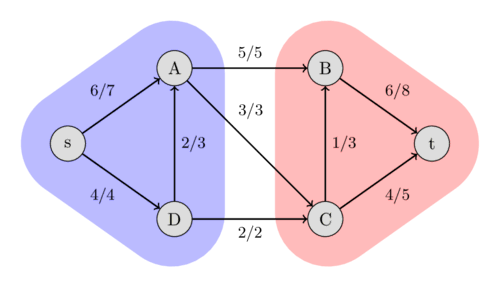

In [17]:
Image(filename='img/ford_fulkerson8.png')

Una extensión del problema de flujo máxio es el **problema de flujo máximo con costo mínimo** donde cada borde $(u, v)$ también tiene un coeficiente de costo $a_{uv}$ además de su capacidad. Si el flujo a través del borde es $f_{uv}$, entonces el costo total es $a_{uv}* f_{uv}$. Se requiere encontrar un flujo de un tamaño $d$ dado, con el menor costo. En la mayoría de las variantes, los coeficientes de costo pueden ser positivos o negativos. Existen varios algoritmos de tiempo polinomial para este problema.


Kale es una herramienta sencilla de utilizar que nos permite familiarizarnos con el flujo de trabajo de kubeflow con kubernetes, además nos permite llevar a cabo experimentos de manera local sin tener que preocuparnos por el momento de levantar clústeres o interactuar con la línea de comandos, nos deja enforcarnos totalmente en nuestro código.

La compilación a C con ayuda de Cython es una buena opción para optimizar y agilizar código en Python que no utiliza objetos vectorizados o que no pueden ser vectorizados, cuando se utiliza Python "pelón" y cuando las variables no cambian de tipo durante la ejecución del código.

No todas las líneas de código tienen su equivalente en C, pues en C no existe el concepto de clase ni de objeto.

Cython nos permite tener la comodidad de programar en Python y la velocidad de un módulo compilado anticipadamente. El costo es que se requiere de conocimiento del lenguaje de C.

## 6. Referecias

+ [Max Flow Problem Introduction](https://www.geeksforgeeks.org/max-flow-problem-introduction/)
+ [Documentación de nuestro paquete](https://optimizacion-2-2021-1-gh-classroom.github.io/practica-2-segunda-parte-diramtz/maxflow.html)
+ [Cortadura mínima](https://en.wikipedia.org/wiki/Max-flow_min-cut_theorem)
+ [Aplicaciones flujo máximo](https://en.wikipedia.org/wiki/Maximum_flow_problem#Real_world_applications)
+ [Coindidencia bipartita](https://en.wikipedia.org/wiki/Introduction_to_Algorithms)
+ [Kubernetes' Documentation](https://kubernetes.io/es/docs/concepts/)
+ [How to explain Kubernetes in plain English](https://enterprisersproject.com/article/2017/10/how-explain-kubernetes-plain-english)
+ [Kubeflow: Starter’s Guide](https://www.globaldots.com/resources/blog/kubeflow-concepts-use-cases-and-starters-guide/)
+ [5.3 Compilación a C](https://itam-ds.github.io/analisis-numerico-computo-cientifico/V.optimizacion_de_codigo/5.3/Compilacion_a_C.html#compilacion-aot-y-jit)